<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Tasa_Incidencia_R_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [0]:
data_03_30 = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto2/2020-03-30-CasosConfirmados.csv',
    index_col='Region')
data_04_10 = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto2/2020-04-10-CasosConfirmados.csv', 
    index_col='Region')

In [0]:
data_03_30_RM = data_03_30.loc['Metropolitana'].set_index('Comuna').copy()
data_04_10_RM = data_04_10.loc['Metropolitana'].set_index('Comuna').copy()

In [0]:
data_03_30_RM['Casos Confirmados'] = data_03_30_RM['Casos Confirmados'].apply(lambda x: 0 if x=='-' else x)
data_03_30_RM['Casos Confirmados'] = data_03_30_RM['Casos Confirmados'].astype(int)

In [0]:
data_04_10_RM = data_04_10_RM[data_03_30_RM['Casos Confirmados']>=1]
data_03_30_RM = data_03_30_RM[data_03_30_RM['Casos Confirmados']>=1]

In [0]:
data_04_10_RM['Casos Confirmados'] = data_04_10_RM['Casos Confirmados'].astype(int)

In [0]:
data_03_30_RM['Tasa Incidencia'] = data_03_30_RM['Casos Confirmados']/data_03_30_RM['Poblacion']*100000
data_04_10_RM['Tasa Incidencia'] = data_04_10_RM['Casos Confirmados']/data_04_10_RM['Poblacion']*100000

In [0]:
data = pd.DataFrame()
data['Tasa Incidencia 2020-03-30'] = data_03_30_RM['Tasa Incidencia']
data['Tasa Incidencia 2020-04-10'] = data_04_10_RM['Tasa Incidencia']
data['Increase'] = data['Tasa Incidencia 2020-04-10']/data['Tasa Incidencia 2020-03-30']*100-100.0

In [9]:
data.head()

,Tasa Incidencia 2020-03-30,Tasa Incidencia 2020-04-10,Increase
Comuna,,,
Buin,6.384473,26.449959,314.285714
Calera de Tango,21.034181,28.045574,33.333333
Cerro Navia,13.336609,29.480925,121.052632
Colina,17.742982,36.594900,106.250000
Conchali,10.057833,33.765581,235.714286


In [0]:
data = data.sort_values(by='Tasa Incidencia 2020-04-10', ascending=True)

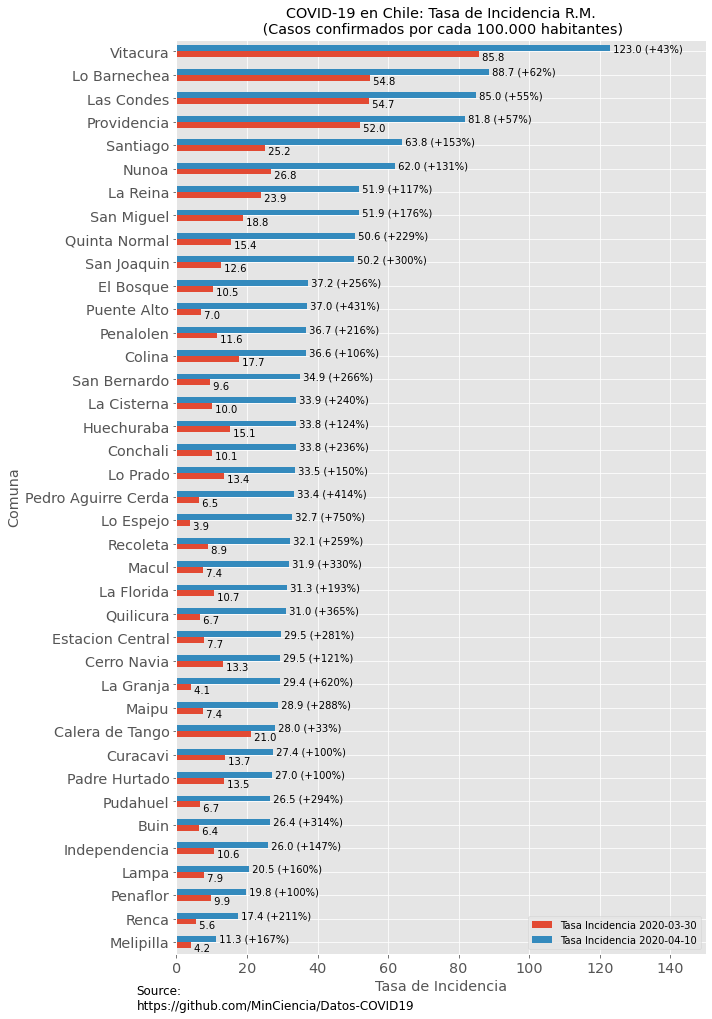

In [15]:
fig, ax = plt.subplots(figsize=(10,14))
data[['Tasa Incidencia 2020-03-30', 'Tasa Incidencia 2020-04-10']].plot(kind='barh', ax=ax, fontsize='x-large')
for i, val in enumerate(data['Tasa Incidencia 2020-04-10']):
  ax.text(val, i, f" {val:.1f} (+{data['Increase'].iloc[i]:.0f}%)", fontsize=10)
for i, val in enumerate(data['Tasa Incidencia 2020-03-30']):
  ax.text(val, i-0.4, f" {val:.1f}", fontsize=10)
ax.set_title(f'COVID-19 en Chile: Tasa de Incidencia R.M.\n (Casos confirmados por cada 100.000 habitantes)', fontsize='x-large')
ax.set_xlabel(f'Tasa de Incidencia', fontsize='x-large')
ax.set_ylabel(f'Comuna', fontsize='x-large')
plt.xlim(0,150)
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-40,-30), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('2020-04-10-COVID-19-Chile-Tasa-Incidencia-RM.png', bbox_inches='tight', format='png', dvi=700)

In [0]:
from google.colab import files
files.download("2020-04-10-COVID-19-Chile-Tasa-Incidencia-RM.png")